## Statistiek 2 – Practicumopdracht 1 
### Fenne van Agthoven 
### Araksan Hassan 
studie: toegepaste wiskunde  
docent: Emiel Kaper  
datum van inleren: maandag 29 april om 23:59 uur  

### Dit practicumopdracht geeft antwoordt op 2 opgaven, namelijk:

Opgave 1 (2 + 4 + 4 = 10 punten)  
Hieronder volgt een drietal geformuleerde vermoedens. Ga na, met behulp van de
aangereikte dataset en de technieken die je bij dit vak aan bod gekomen zijn, of deze
vermoedens gegrond zijn. Geef steeds aan:  
 welke hypothesetoets je gebruikt, en waarom die  
 de Python-code waarmee je de hypothesetoets uitvoert, en de output die
daaruit komt, en  
 welke conclusie je trekt op basis van de output van Python, waarbij je de
conclusie ook weer terugvertaalt naar de context van het vermoeden.  
a. Studenten die op kamers wonen, zijn naast de studie meer bezig met andere
dingen dan studenten die thuis wonen.  
b. Voor de meeste studenten geldt dat ze een hoger cijfer voor Nederlands op
hun cijferlijst hebben staan dan voor Engels.  
c. Er zijn verhoudingsgewijs minder TP-studenten1 in hogere schoolniveaus te
vinden dan in lagere schoolniveaus.  

Opgave 2 (12 + 2 + 6 = 20 punten)  
De hogeschool is benieuwd welke factoren nu invloed hebben op de mate van
succes van een eerstejaarsstudent in de opleidingen én of het daarbij ook uitmaakt
welke opleiding iemand doet. Omdat de dataset alleen studenten bevat die een
positief BSA hebben gehaald, wordt succes gemeten met behulp van het gemiddelde
cijfer aan het eind van jaar 1.  
a. Bepaal een zo statistisch valide mogelijk model waarmee het gemiddelde cijfer
aan het eind van jaar 1 verklaard kan worden. Onderbouw in je uitwerking ook
waarom het model statistisch valide is of, als je denkt dat een statistisch valide
model niet mogelijk is, waarom het door jou gevonden model het dichtst bij
een statistisch valide model in de buurt komt.  
Laat de volledige werkwijze zien waarmee je tot het uiteindelijke model
gekomen bent.  
b. Vind je jouw model van vraag 2a goed genoeg om het gemiddelde eindcijfer in
jaar 1 mee te kunnen verklaren? Leg uit!  
c. Geef, op basis van jouw model van vraag 2a, antwoord op de volgende vraag
van het docententeam: "Welke eigenschappen dragen bij aan het succes van
studenten op de opleiding, en zijn er wat dat betreft verschillen tussen de
opleidingen Accountancy en Finance & Control?"  

In [5]:
##dataset inladen
import pandas as pd
studenten=pd.read_csv('studenten.csv')
studenten

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,uitwonend,ja,samenwonend,vmbo,5,8,8,NaN
1,Finance & Control,8.70,9,20,11,21.6,thuiswonend,ja,samenwonend,vmbo,6,6,6,NaN
2,Accountancy,10.00,10,19,16,16.1,thuiswonend,ja,gescheiden,havo,8,6,5,A
3,Accountancy,7.88,8,13,9,15.0,thuiswonend,ja,samenwonend,vmbo,5,7,8,NaN
4,Accountancy,6.13,7,13,14,12.8,thuiswonend,nee,samenwonend,vmbo,7,6,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Accountancy,6.64,5,13,13,10.9,thuiswonend,ja,samenwonend,havo,5,7,6,A
313,Accountancy,8.51,8,16,8,13.1,thuiswonend,ja,samenwonend,havo,7,7,5,A
314,Finance & Control,5.73,5,12,12,12.7,thuiswonend,ja,samenwonend,vmbo,6,6,5,NaN
315,Accountancy,6.88,8,6,16,14.2,thuiswonend,ja,samenwonend,vmbo,7,5,6,NaN


### Opgave 1

A. Studenten die op kamers wonen, zijn naast de studie meer bezig met andere
dingen dan studenten die thuis wonen.
- welke hypothesetoets je gebruikt, en waarom die  
- de Python-code waarmee je de hypothesetoets uitvoert, en de output die
daaruit komt, en  
- welke conclusie je trekt op basis van de output van Python, waarbij je de
conclusie ook weer terugvertaalt naar de context van het vermoeden.  

- De hypothesetoets die wij gebruiken is de ongepaarde T-toets, omdat er een meting wordt gedaan onder twee aparte groepen waarbij ieder persoon één keer wordt gemeten.

<Axes: xlabel='woonsituatie', ylabel='uren_activiteiten'>

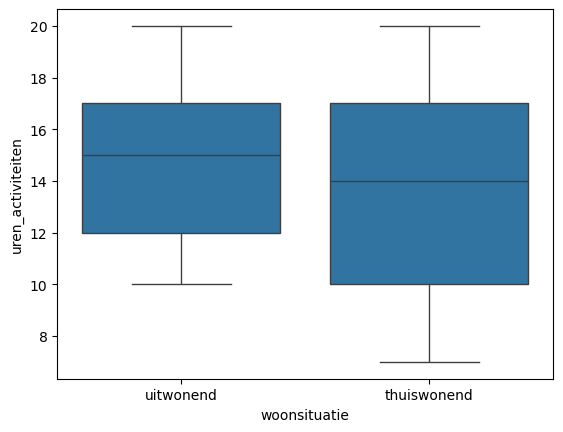

In [26]:
import scipy.stats as st         # inladen bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns            # hiermee maken we de mooiste plots, geleerd uit brightspace
studenten = pd.DataFrame(studenten)   # dataset als frame

sns.boxplot(y=studenten.uren_activiteiten, x=studenten.woonsituatie) # plotten van de boxplot

In [21]:
# maak twee rijen
thuiswonend = studenten.where(studenten.woonsituatie=='thuiswonend').dropna().uren_activiteiten
uitwonend = studenten.where(studenten.woonsituatie=='uitwonend').dropna().uren_activiteiten

# de ongepaarde (independent) t-toets, met ongelijke varianties (kijk maar naar de boxplots)
st.ttest_ind(thuiswonend,uitwonend,equal_var=True)

TtestResult(statistic=-0.7354462650536336, pvalue=0.46299910702409786, df=185.0)